In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

from sklearn import datasets

## Using gradient descent to find linear regresion

Now let's look at Linear Regression Example in $\mathbb{R}^2$

   Suppose we are given 5 points $(x,y)$ in $\mathbb{R}^2$ and we need to find a regresion line of the form $y=wx$. So first, we pick some value for $w$. Let's say zero. In other words, we are considering line $y=0$ as our regression line.

In [2]:
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])

w=0.0

We check how bad is our approximation by computing a loss function. We are using a square difference model for loss function. To do this, we find the difference between predicted values and true values, then square them and find the average of those squares. So, $$Loss  = \frac{1}{5} \sum_{i=1}^5 (wx_i-y_i)^2$$

Remark 1: This loss function is called MSE (Mean Square Error). Note that technically we need a square root of this loss (called RMSE), but minimizing square root of loss is the same as minimizing loss.

Remark 2: We can vectorize this. If we consider all $x$ and $y$ inputs as single vectors ${\bf x}$ and ${\bf y}$, then the difference inside the square can be calculated for all inputs at once as $w{\bf x}-{\bf y}$. Then if take the squared norm $||w{\bf x}-{\bf y}||^2$, it takes care of square and a sum. So, finally, we get that $$Loss  = \frac{1}{5}||w{\bf x}-{\bf y}||^2$$

In [ ]:
y_hat=w*x

loss = ((y_hat-y)**2).mean()   ## reminder that square here squares each entry of a vector separatelly.
print(loss)

44.0


Note that after squaring above we have a vector, and so  `.mean()` will add all the values and divide by their amount getting exactly what we need. Alternativelly, you can use dot product: `loss=1/len(x)*np.dot(y_hat-y,y_hat-y)`. You should conviced yourself that this is the same.

We want to minimize the loss, so we find the gradient of loss with respect to $w$. Since it is just one parameter. It is just a simple chain rule:


$$\frac{\partial Loss}{\partial w}=\frac{1}{5}\sum_{i=1}^5 2(wx_i-y_i)*x_i$$

Note, we can take this derivative directly from the vector form as well:

$$\frac{\partial Loss}{\partial w} =\frac{1}{5} 2(w{\bf x}-{\bf y})\cdot {\bf x}$$

In [ ]:
dldw=(2*(w*x-y)*x).mean()  # reminder: if we use * as product between vectors, it multiplies each corresponding entries of two vectors.
dldw

-44.0

Since we want to minimize the Loss, we need to move $w$ in the negative gradient direction ("Gradient descent"). So in our case we would add 44 to w. And then repeat the process. However, normally we dont want to go there too fast so that we dont jump over the minimum, so our descent needs to be a bit more gradual. For that we use `Learning Rate` to descrease by how much we change our parameters. I will use learning rate 0.01 in this example:

In [ ]:
w=w-0.01*dldw
w

0.44

This is our new $w$. Let's check the loss for it

In [ ]:
y_hat=w*x

loss = ((y_hat-y)**2).mean()
print(loss)

26.769600000000004


Let's repeat this problem. This time I will do everything at once and run this 10 times each time updating our $w$. I will save all values for $w$ we get and then plot all lines:

In [ ]:
def forward(w,x):
    return w*x
def lossfunc(y_pred, y):
    return ((y_pred-y)**2).mean()
def gradient(w, y, x):
    gr=(2*(w*x-y)*x).mean()
    return gr

# Initial values
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])

w=0.0
n_epoch=10
lr=0.01
ws=np.array([w])

## Training loop
for epoch in range(n_epoch):
    #forward phase
    y_hat=forward(w,x)

    #loss
    loss=lossfunc(y_hat,y)

    #backward phase
    gr=gradient(w,y,x)

    #Update
    w-=gr*lr

    print(f' epoch {epoch+1}: w= {w:.3f}, loss = {loss:.3f}')
    ws=np.append(ws,w)


 epoch 1: w= 0.440, loss = 44.000
 epoch 2: w= 0.783, loss = 26.770
 epoch 3: w= 1.051, loss = 16.287
 epoch 4: w= 1.260, loss = 9.909
 epoch 5: w= 1.423, loss = 6.029
 epoch 6: w= 1.550, loss = 3.668
 epoch 7: w= 1.649, loss = 2.231
 epoch 8: w= 1.726, loss = 1.358
 epoch 9: w= 1.786, loss = 0.826
 epoch 10: w= 1.833, loss = 0.503


As you can see our loss is going down. Let's plot our data and the lines

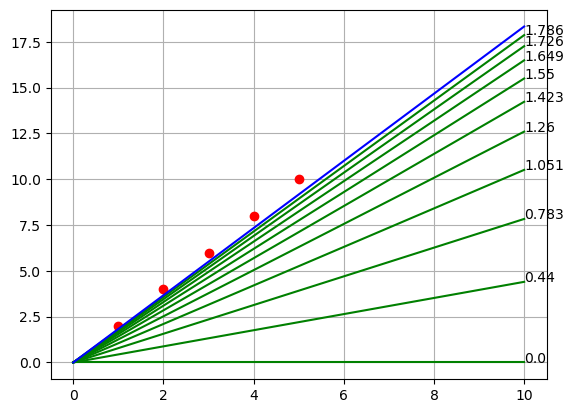

In [ ]:
fig=plt.figure()
xv=np.linspace(0,10, 1000)
plt.grid()

plt.plot(x,y,'ro')          # data
for i in range(len(ws)-1):
    plt.plot(xv, ws[i]*xv, 'g')   # starting and intermediary lines
    plt.annotate(np.round(ws[i],3), xy=(10,ws[i]*10))
plt.plot(xv, ws[-1]*xv, 'b')      # final line
plt.show()

Let's try this with two parameters. Now I want my model to be $y=wx+b$.
Note that
$$\frac{\partial Loss}{\partial b}=\frac{1}{5}\sum_{i=1}^5 2(wx_i+b-y_i)$$

Moreover, in python we can add a scalar to every entry on a vector, by using addition.

In [ ]:
def forward(w,b,x):
    return w*x+b
def lossfunc(y_pred, y):
    return ((y_pred-y)**2).mean()
def gradient(w, b, y, x):
    gr_w=(2*(w*x+b-y)*x).mean()
    gr_b=(2*(w*x+b-y)).mean()
    return gr_w, gr_b

# Initial values
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])

w=0.0
b=0.0
n_epoch=10
lr=0.01
param=np.array([w,b])

## Training loop
for epoch in range(n_epoch):
    #forward phase
    y_hat=forward(w,b,x)

    #loss
    loss=lossfunc(y_hat,y)

    #backward
    gr_w, gr_b=gradient(w, b, y,x)

    #Update
    w-=gr_w*lr
    b-=gr_b*lr

    print(f' epoch {epoch+1}: w= {w:.3f}, b= {b:.3f}, loss = {loss:.3f}')
    param=np.vstack((param,[w,b]))


 epoch 1: w= 0.440, b= 0.120, loss = 44.000
 epoch 2: w= 0.776, b= 0.211, loss = 25.661
 epoch 3: w= 1.033, b= 0.280, loss = 14.973
 epoch 4: w= 1.229, b= 0.333, loss = 8.745
 epoch 5: w= 1.378, b= 0.372, loss = 5.116
 epoch 6: w= 1.493, b= 0.402, loss = 3.000
 epoch 7: w= 1.580, b= 0.425, loss = 1.768
 epoch 8: w= 1.647, b= 0.441, loss = 1.049
 epoch 9: w= 1.698, b= 0.454, loss = 0.630
 epoch 10: w= 1.737, b= 0.463, loss = 0.386


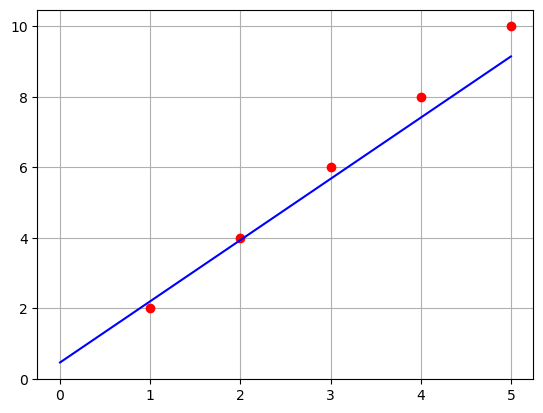

In [ ]:
fig=plt.figure()
xv=np.linspace(0,5, 1000)
plt.grid()

plt.plot(x,y,'ro')          # data
#for i in range(len(ws)-1):
 #   plt.plot(xv, param[i][0]*xv+param[i][1], 'g')   # starting and intermediary lines
plt.plot(xv, param[-1][0]*xv+param[-1][1], 'b')      # final line
plt.show()

### Small note regarding Gradient Descent batches.

Regular gradient descent goes through the whole data set before updating parameters. If our dataset is large, this can be quite long process. Maybe we can upload the data into memory in chunks. So we have few variants.

1. Stochastic Gradient Descent (SGD): each iteration 1 data point is chosen at random and parameters are updated.

2. Mini-batch Gradient Descent: the data set is broken into a few subsets (batches),  parameters are updated after going through a single batch. Then, next batch is chosen.

The latter one is a quite common tool in Machine Learning especially in deep learning.

Here is an example where we permute our data and break into batches. Compare losses to the problem above.

In [ ]:
def forward(w,b,x):
    return w*x+b
def lossfunc(y_pred, y):
    return ((y_pred-y)**2).mean()
def gradient(w, b, y, x):
    gr_w=(2*(w*x+b-y)*x).mean()
    gr_b=(2*(w*x+b-y)).mean()
    return gr_w, gr_b

def shuffle_data(X, y):
    N = X.shape[0]
    shuffled_idx = np.random.permutation(N)
    return X[shuffled_idx], y[shuffled_idx]

# Initial values
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])
x, y = shuffle_data(x, y)
N=x.shape[0]
batch_size=3
n_batches=N//batch_size

w=0.0
b=0.0
n_epoch=10
lr=0.01
param=np.array([w,b])

## Training loop
for epoch in range(n_epoch):
    running_loss = 0.0
    bn=1
    for b_idx in range(0, N, batch_size):
        x_batch=x[b_idx:b_idx+batch_size]
        y_batch=y[b_idx:b_idx+batch_size]
    #forward phase
        y_hat=forward(w,b,x_batch)

    #loss
        loss=lossfunc(y_hat,y_batch)
        running_loss+=(loss*x_batch.shape[0])
    #backward
        gr_w, gr_b=gradient(w, b, y_batch,x_batch)

    #Update
        w-=gr_w*lr
        b-=gr_b*lr

        print(f' epoch {epoch+1}, batch {bn}: loss = {loss:.3f} ')
        bn+=1
    avg_loss = running_loss/ N
    print(f' epoch {epoch+1}: w= {w:.3f}, b= {b:.3f}, loss = {avg_loss:.3f}')
    param=np.vstack((param,[w,b]))


 epoch 1, batch 1: loss = 50.667 
 epoch 1, batch 2: loss = 17.978 
 epoch 1: w= 0.754, b= 0.205, loss = 37.591
 epoch 2, batch 1: loss = 18.006 
 epoch 2, batch 2: loss = 6.316 
 epoch 2: w= 1.202, b= 0.326, loss = 13.330
 epoch 3, batch 1: loss = 6.436 
 epoch 3, batch 2: loss = 2.229 
 epoch 3: w= 1.469, b= 0.396, loss = 4.753
 epoch 4, batch 1: loss = 2.328 
 epoch 4, batch 2: loss = 0.804 
 epoch 4: w= 1.628, b= 0.436, loss = 1.718
 epoch 5, batch 1: loss = 0.863 
 epoch 5, batch 2: loss = 0.311 
 epoch 5: w= 1.723, b= 0.458, loss = 0.642
 epoch 6, batch 1: loss = 0.337 
 epoch 6, batch 2: loss = 0.143 
 epoch 6: w= 1.779, b= 0.470, loss = 0.260
 epoch 7, batch 1: loss = 0.146 
 epoch 7, batch 2: loss = 0.087 
 epoch 7: w= 1.813, b= 0.476, loss = 0.122
 epoch 8, batch 1: loss = 0.075 
 epoch 8, batch 2: loss = 0.068 
 epoch 8: w= 1.834, b= 0.478, loss = 0.073
 epoch 9, batch 1: loss = 0.048 
 epoch 9, batch 2: loss = 0.063 
 epoch 9: w= 1.847, b= 0.478, loss = 0.054
 epoch 10, bat

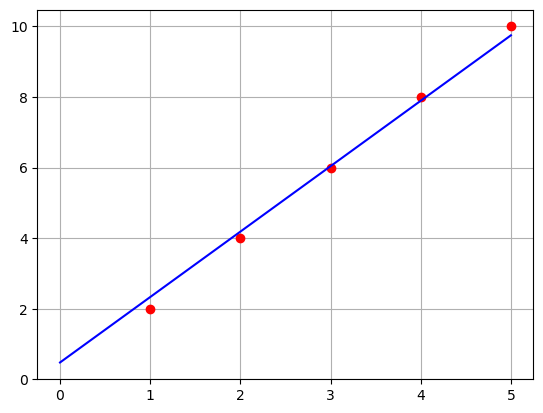

In [ ]:
fig=plt.figure()
xv=np.linspace(0,5, 1000)
plt.grid()

plt.plot(x,y,'ro')          # data
#for i in range(len(ws)-1):
 #   plt.plot(xv, param[i][0]*xv+param[i][1], 'g')   # starting and intermediary lines
plt.plot(xv, param[-1][0]*xv+param[-1][1], 'b')      # final line
plt.show()

### Using PyTorch

We will be using SGD (Stochastic Gradient Descent). While it is called SGD, it actually is not always is in PyTorch. It calculates gradient descent based on what is calculated by loss function. So, if you compute loss function based on 1 data point, it is SGD, but if your loss function goes over the whole data set, then it is just a regular gradient descent that we used above.

We can use mini-batches with PyTorch well. In fact, it is quite easy to do using DataLoader. I will do one example at the end of this file.

In [3]:
#set up
xt=torch.tensor([1,2,3,4,5],dtype=torch.float32)
yt=torch.tensor([2,4,6,8,10],dtype=torch.float32)
w=torch.tensor(0.0, dtype=torch.float32, requires_grad=True)
b=torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

lr=0.01
n_epoch=10

#needed function
def forward(w,b,x):
    return w*x+b

lossfunc=nn.MSELoss()
optimizer=torch.optim.SGD([w, b], lr=lr)   #stochastic gradient descent

#training
for epoch in range(n_epoch):
    #forward
    y_pred=forward(w, b, xt)
    #loss
    loss=lossfunc(yt, y_pred)
    #reset gradients
    optimizer.zero_grad()
    #gradient
    loss.backward()
    #update
    optimizer.step()


    print(f' epoch {epoch+1}: w= {w:.3f}, b= {b:.3f}, loss = {loss:.3f}')


 epoch 1: w= 0.440, b= 0.120, loss = 44.000
 epoch 2: w= 0.776, b= 0.211, loss = 25.661
 epoch 3: w= 1.033, b= 0.280, loss = 14.973
 epoch 4: w= 1.229, b= 0.333, loss = 8.745
 epoch 5: w= 1.378, b= 0.372, loss = 5.116
 epoch 6: w= 1.493, b= 0.402, loss = 3.000
 epoch 7: w= 1.580, b= 0.425, loss = 1.768
 epoch 8: w= 1.647, b= 0.441, loss = 1.049
 epoch 9: w= 1.698, b= 0.454, loss = 0.630
 epoch 10: w= 1.737, b= 0.463, loss = 0.386


More condensed way

In [4]:
#set up
xt=torch.tensor([1,2,3,4,5],dtype=torch.float32).reshape(-1,1)
yt=torch.tensor([2,4,6,8,10],dtype=torch.float32).reshape(-1,1)

n_sample, n_features = xt.shape

model=nn.Linear(n_features, 1)  # replaces forward with built-in model class

# if you want to inialize parameters to zero to match previous example
with torch.inference_mode():
    model.weight[0,0] = 0
    model.bias[0] = 0

lr=0.01
n_epoch=10

lossfunc=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=lr)

#training
for epoch in range(n_epoch):
    #forward
    y_pred=model(xt)
    #loss
    loss=lossfunc(yt, y_pred)
    #gradient
    loss.backward()
    #update
    optimizer.step()
    #reset gradients
    optimizer.zero_grad()

    [w,b]=model.parameters()
    print(f' epoch {epoch+1}: w= {w[0][0]:.3f}, b= {b[0]:.3f}, loss = {loss:.3f}')

 epoch 1: w= 0.440, b= 0.120, loss = 44.000
 epoch 2: w= 0.776, b= 0.211, loss = 25.661
 epoch 3: w= 1.033, b= 0.280, loss = 14.973
 epoch 4: w= 1.229, b= 0.333, loss = 8.745
 epoch 5: w= 1.378, b= 0.372, loss = 5.116
 epoch 6: w= 1.493, b= 0.402, loss = 3.000
 epoch 7: w= 1.580, b= 0.425, loss = 1.768
 epoch 8: w= 1.647, b= 0.441, loss = 1.049
 epoch 9: w= 1.698, b= 0.454, loss = 0.630
 epoch 10: w= 1.737, b= 0.463, loss = 0.386


### Bigger set

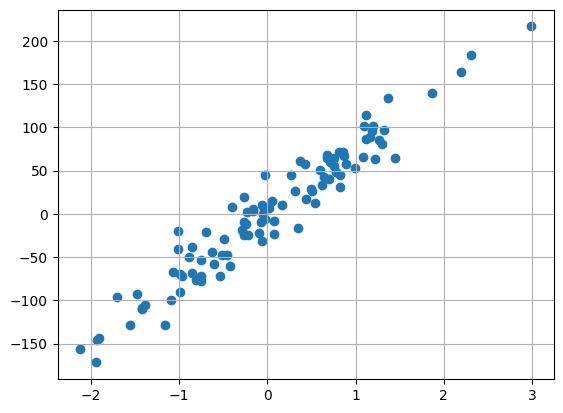

In [5]:
X_num, y_num = datasets.make_regression(n_samples=100, n_features=1, noise=20)

X=torch.from_numpy(X_num.astype(np.float32))
y=torch.from_numpy(y_num.astype(np.float32))

y=y.reshape(-1,1)          # transforming y from row to column vector
n_samples, n_features = X.shape


fig=plt.figure()
xv=np.linspace(0,5, 1000)
plt.grid()

plt.scatter(X,y)
plt.show()

In [6]:
model=nn.Linear(n_features, 1)

lr=0.06
n_epoch=10

lossfunc=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=lr)

#training
for epoch in range(n_epoch):
    y_pred=model(X)
    loss=lossfunc(y, y_pred)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    [w,b]=model.parameters()
    print(f' epoch {epoch+1}: w= {w[0][0]:.3f}, b= {b[0]:.3f}, loss = {loss:.3f}')

 epoch 1: w= 9.019, b= -0.327, loss = 5772.011
 epoch 2: w= 16.764, b= 0.137, loss = 4553.006
 epoch 3: w= 23.581, b= 0.499, loss = 3609.855
 epoch 4: w= 29.579, b= 0.776, loss = 2879.998
 epoch 5: w= 34.859, b= 0.983, loss = 2315.090
 epoch 6: w= 39.505, b= 1.133, loss = 1877.769
 epoch 7: w= 43.595, b= 1.237, loss = 1539.154
 epoch 8: w= 47.195, b= 1.304, loss = 1276.916
 epoch 9: w= 50.364, b= 1.340, loss = 1073.789
 epoch 10: w= 53.154, b= 1.353, loss = 916.419


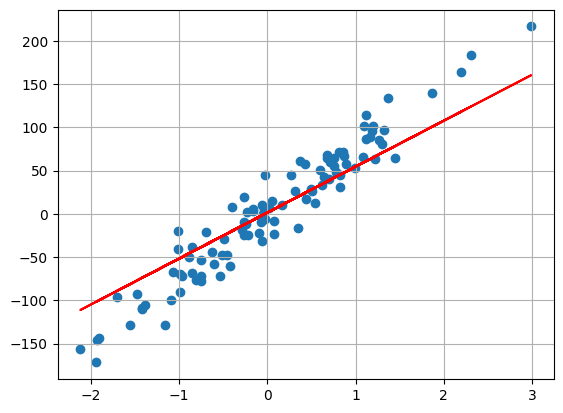

In [7]:
with torch.inference_mode():
    y_pred_line=model(X)
    fig=plt.figure()
    plt.scatter(X,y)
    plt.plot(X, y_pred_line, 'r')
    plt.grid()
    plt.show()

As promised, here is an example with DataLoader:

In [8]:
from torch.utils.data import DataLoader,TensorDataset

dataset = TensorDataset(X, y)
train_loader = DataLoader(dataset, batch_size=10, shuffle=True)

In [9]:


model=nn.Linear(n_features, 1)

lr=0.06
n_epoch=10

lossfunc=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=lr)

#training
for epoch in range(n_epoch):
    for i,(inputs, labels) in enumerate(train_loader):
        y_pred=model(inputs)
        loss=lossfunc(labels, y_pred)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        [w,b]=model.parameters()
    print(f' epoch {epoch+1}: w= {w[0][0]:.3f}, b= {b[0]:.3f}, loss = {loss:.3f}')

 epoch 1: w= 53.750, b= 1.146, loss = 1170.349
 epoch 2: w= 68.364, b= 0.818, loss = 454.482
 epoch 3: w= 72.514, b= 0.502, loss = 360.330
 epoch 4: w= 72.377, b= 0.601, loss = 303.580
 epoch 5: w= 73.677, b= 0.337, loss = 303.705
 epoch 6: w= 73.804, b= 1.389, loss = 322.016
 epoch 7: w= 74.157, b= 0.488, loss = 232.217
 epoch 8: w= 73.370, b= -0.141, loss = 181.992
 epoch 9: w= 74.419, b= -0.611, loss = 281.538
 epoch 10: w= 73.429, b= 0.516, loss = 209.963


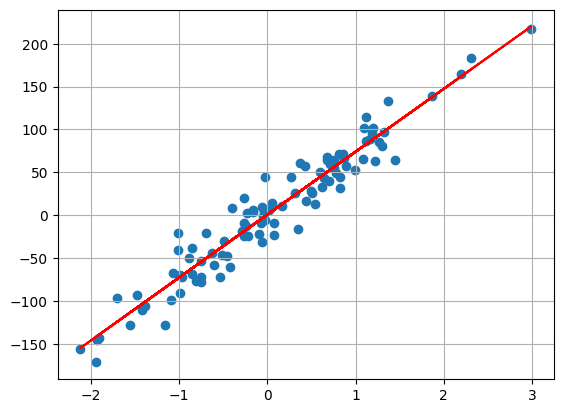

In [10]:
with torch.inference_mode():
    y_pred_line=model(X)
    fig=plt.figure()
    plt.scatter(X,y)
    plt.plot(X, y_pred_line, 'r')
    plt.grid()
    plt.show()